In [16]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()


,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [17]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [18]:
from datetime import datetime
dados["idade"] = datetime.today().year - dados["ano_do_modelo"]
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,25
1,7843,1998,40557.96,1,12622.05362,27
2,7109,2006,89627.50,0,11440.79806,19
3,26823,2015,95276.14,0,43167.32682,10
4,7935,2014,117384.68,1,12770.11290,11


In [19]:
dados = dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,25
1,40557.96,1,12622.05362,27
2,89627.50,0,11440.79806,19
3,95276.14,0,43167.32682,10
4,117384.68,1,12770.11290,11


In [20]:
x = dados.drop(["vendido"], axis=1)
y = dados['vendido']

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

seed = 1256

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=seed, stratify=y)

print(f"Treinaremos com {len(x_treino)} elementos")
print(f"Testaremos com {len(x_teste)} elementos")

scaler = StandardScaler()
scaler.fit(x_treino)

x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

modelo = DummyClassifier()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos
Testaremos com 2500 elementos
A acurácia foi de 58.00%


In [25]:

seed = 1256

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=seed, stratify=y)

print(f"Treinaremos com {len(x_treino)} elementos")
print(f"Testaremos com {len(x_teste)} elementos")

#scaler = StandardScaler()
#scaler.fit(x_treino)

x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

modelo = SVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos
Testaremos com 2500 elementos
A acurácia foi de 77.08%


In [37]:
from sklearn.tree import DecisionTreeClassifier

seed = 1256

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=seed, stratify=y)

print(f"Treinaremos com {len(x_treino)} elementos")
print(f"Testaremos com {len(x_teste)} elementos")

#scaler = StandardScaler()
#scaler.fit(x_treino)

#x_treino = scaler.transform(x_treino)
#x_teste = scaler.transform(x_teste)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos
Testaremos com 2500 elementos
A acurácia foi de 78.72%


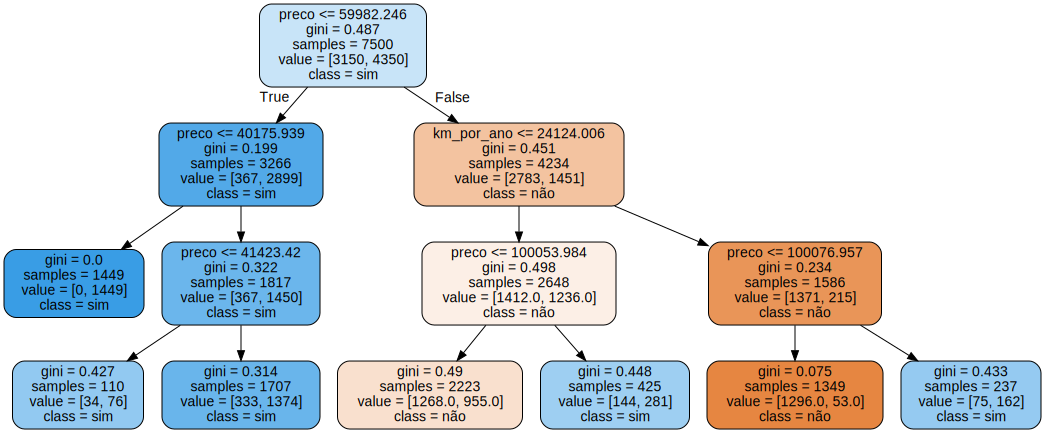

In [38]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, filled=True, rounded=True, feature_names=x.columns, class_names=["não", "sim"])
grafico = graphviz.Source(estrutura)
grafico